In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
C1_c = "#649B1C"
C2_c = "#00B593"
C3_c = "#4E84D4"

In [11]:
ar6_data = pd.read_csv("AR6_5y_growthRate_gas.csv")
ar6_data['unit'] = ar6_data[['Model', 'Scenario']].agg('*'.join, axis=1)
ar6_data

,Region,year,Model,Scenario,Category,growth_rate,unit
0,R10NORTH_AM,2025,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.014495,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
1,R10NORTH_AM,2026,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.028047,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
2,R10NORTH_AM,2027,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.042829,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
3,R10NORTH_AM,2028,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.059065,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
4,R10NORTH_AM,2029,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,-0.077047,REMIND-MAgPIE 2.1-4.2*CEMICS_SSP2-1p5C-fullCDR
...,...,...,...,...,...,...,...
39333,R10INDIA+,2046,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000_DR3p,C3,0.054438,MESSAGEix-GLOBIOM_1.1*EN_NPi2020_1000_DR3p
39334,R10INDIA+,2047,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000_DR3p,C3,0.051641,MESSAGEix-GLOBIOM_1.1*EN_NPi2020_1000_DR3p
39335,R10INDIA+,2048,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000_DR3p,C3,0.049122,MESSAGEix-GLOBIOM_1.1*EN_NPi2020_1000_DR3p
39336,R10INDIA+,2049,MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1000_DR3p,C3,0.046841,MESSAGEix-GLOBIOM_1.1*EN_NPi2020_1000_DR3p


In [12]:
hist_data = pd.read_csv("hist_5y_growthRate_gas.csv")
hist_data

,year,Country Code,growth_rate,Capacity (GW),AR6_R10,ISO,R_Choice
0,2000,DEU,0.071852,12.543,R10EUROPE,DEU,1
1,2001,DEU,0.049329,12.787,R10EUROPE,DEU,1
2,2002,DEU,0.038668,12.900,R10EUROPE,DEU,1
3,2003,DEU,0.031827,12.986,R10EUROPE,DEU,1
4,2004,DEU,0.036718,13.553,R10EUROPE,DEU,1
...,...,...,...,...,...,...,...
1160,2021,SYR,0.024770,6.513,R10MIDDLE_EAST,SYR,0
1161,2021,SEN,0.167503,0.436,R10AFRICA,SEN,0
1162,2019,TJK,0.000000,0.206,R10REF_ECON,TJK,0
1163,2020,TJK,0.000000,0.206,R10REF_ECON,TJK,0


Text(0, 0.5, 'Growth rate of capacity')

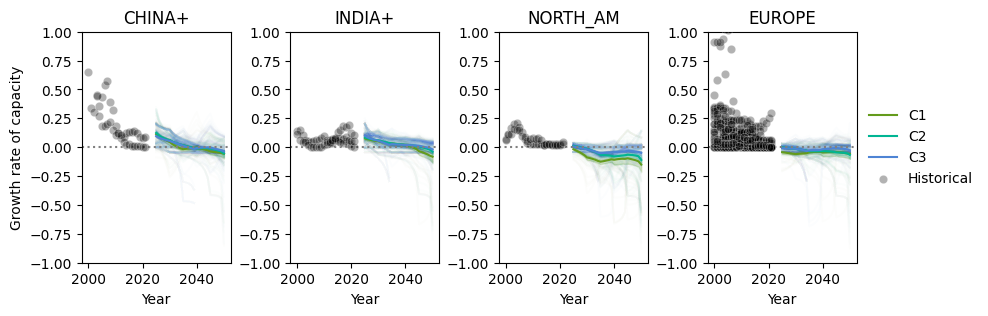

In [14]:
selected_region = [ 'R10CHINA+', 'R10INDIA+', 'R10NORTH_AM','R10EUROPE']
C_colors = [C1_c, C2_c, C3_c]
C_list = ["C1", "C2", "C3"]
fig, axes = plt.subplots(1,4,figsize=(10,3))
fig.subplots_adjust(wspace=0.4)
for reg in selected_region:
    ind = selected_region.index(reg)
    this_ax = axes[ind]
    ar6_data_reg = ar6_data.query("Region==@reg")
    sns.lineplot(x="year", y="growth_rate",hue="Category",data=ar6_data_reg,palette=C_colors,ax=this_ax,units="unit",estimator=None,alpha=0.01,legend=None)
    sns.lineplot(x="year", y="growth_rate",hue="Category",data=ar6_data_reg,palette=C_colors,ax=this_ax)
    sns.scatterplot(x="year", y="growth_rate", data=hist_data.query("AR6_R10==@reg"),ax=this_ax,alpha=0.3,color="black",label="Historical",zorder=10)
    this_ax.axhline(0,color="gray",linestyle=":")
    if ind != 0:
        this_ax.set_ylabel(None)
    this_ax.set_ylim([-1,1])
    this_ax.set_title(reg[3:])
    this_ax.set_xlabel("Year")
    
    if ind !=3:
        this_ax.get_legend().remove()
    else:
        this_ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
axes[0].set_ylabel("Growth rate of capacity")